In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

In [40]:
df=pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980/12/12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980/12/15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980/12/16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980/12/17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980/12/18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


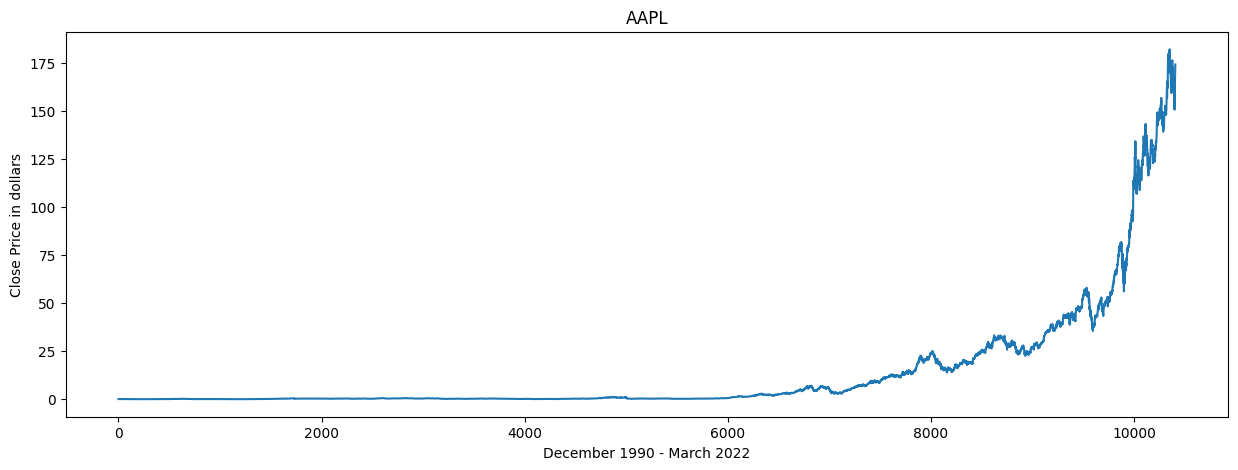

In [41]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('AAPL')
plt.ylabel('Close Price in dollars')
plt.xlabel("December 1990 - March 2022")
plt.show()

In [42]:
splitted = df['Date'].str.split('/', expand=True)
df['day']=splitted[1].astype('int')
df['month']=splitted[0].astype('int')
df['year']=splitted[2].astype('int')
df['is_quarter_end']=np.where(df['month']%3==0,1,0)
df=df.drop(columns=['Date'])

In [43]:
df['open-close']=df['Open']-df['Close']
df['low-high']=df['Low']-df['High']
df['target']=np.where(df['Close'].shift(-1)>df['Close'],1,0)

df.head()
#Target feature is a signal whether to buy or not 

,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,0.128348,0.128906,0.128348,0.128348,0.100323,469033600,12,1980,12,1,0.000000,-0.000558,0
1,0.122210,0.122210,0.121652,0.121652,0.095089,175884800,12,1980,15,1,0.000558,-0.000558,0
2,0.113281,0.113281,0.112723,0.112723,0.088110,105728000,12,1980,16,1,0.000558,-0.000558,1
3,0.115513,0.116071,0.115513,0.115513,0.090291,86441600,12,1980,17,1,0.000000,-0.000558,1
4,0.118862,0.119420,0.118862,0.118862,0.092908,73449600,12,1980,18,1,0.000000,-0.000558,1


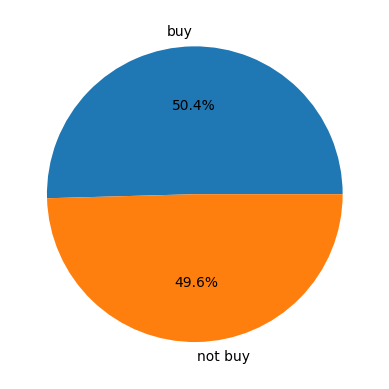

In [44]:
plt.pie(df['target'].value_counts().values,
        labels=['buy','not buy'], autopct='%1.1f%%')
plt.show()

#The pie chart shows if the target is balanced or not 
#Make sure that there are no highly correlated features as it does not help in the learning process of the algorithm

In [45]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
Open,1.000000,0.999945,0.999928,0.999861,0.999494,-0.189987,0.008149,0.643184,-0.003125,-0.061520,-0.036317,-0.860040,0.026817
High,0.999945,1.000000,0.999910,0.999931,0.999589,-0.189387,0.007958,0.642811,-0.003066,-0.061554,-0.043793,-0.862846,0.026792
Low,0.999928,0.999910,1.000000,0.999929,0.999547,-0.190955,0.008339,0.643496,-0.002993,-0.061373,-0.044695,-0.855995,0.026901
Close,0.999861,0.999931,0.999929,1.000000,0.999641,-0.190182,0.008159,0.643105,-0.003061,-0.061421,-0.052950,-0.859461,0.026632
Adj Close,0.999494,0.999589,0.999547,0.999641,1.000000,-0.193284,0.007882,0.628721,-0.003089,-0.060839,-0.053464,-0.860674,0.025908
Volume,-0.189987,-0.189387,-0.190955,-0.190182,-0.193284,1.000000,-0.054023,0.176063,-0.011125,0.035701,0.020186,0.103652,0.016827
day,0.008149,0.007958,0.008339,0.008159,0.007882,-0.054023,1.000000,-0.014138,0.001402,-0.007721,-0.000923,0.007551,0.002828
month,0.643184,0.642811,0.643496,0.643105,0.628721,0.176063,-0.014138,1.000000,-0.003237,0.011041,-0.023967,-0.526638,0.058018
year,-0.003125,-0.003066,-0.002993,-0.003061,-0.003089,-0.011125,0.001402,-0.003237,1.000000,0.000984,-0.003716,0.005378,-0.006955
is_quarter_end,-0.061520,-0.061554,-0.061373,-0.061421,-0.060839,0.035701,-0.007721,0.011041,0.000984,1.000000,-0.003189,0.059755,0.021446


<Axes: >

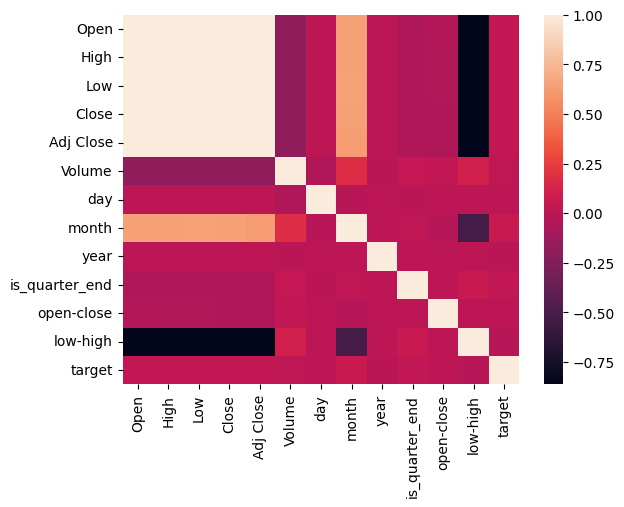

In [46]:
sb.heatmap(df.corr())
#This heatmap tells us there is a high correlation between OHLC

In [47]:
#Data Splitting and Normalization

features = df[['open-close','low-high','is_quarter_end']]
target=df['target']

scaler=StandardScaler()
features=scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2020)
print(X_train.shape, X_valid.shape)

#Traning:Test ratio is 9:1

(9368, 3) (1041, 3)


In [48]:
#Use ROC-AUC curve to measure the accuracy of the predictions

models=[LogisticRegression(),SVC(kernel='poly',probability=True),XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)
    
    print(f'{models[i]}:')
    print('Training Accuracy:', metrics.roc_auc_score(Y_train,models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy:', metrics.roc_auc_score(Y_valid,models[i].predict_proba(X_valid)[:,1]))
    print()
    
#XGBClassifier is overfitting as the difference between the Training accuracy and validation accuracy is high

LogisticRegression():
Training Accuracy: 0.5327998050863527
Validation Accuracy: 0.5045493470348962

SVC(kernel='poly', probability=True):
Training Accuracy: 0.5302029089357605
Validation Accuracy: 0.5095010298319048

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...):
Training Accuracy: 0.77